# About Dataset

# Overview
This dataset contains detailed records of coffee sales from a vending machine.
The vending machine is the work of a dataset author who is committed to providing an
open dataset to the community.
It is intended for analysis of purchasing patterns, sales trends, and customer
preferences related to coffee products.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data= pd.read_csv('/content/index.csv')
data.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


# Pre-Processing:

In [ ]:
df=data[['money','datetime']].copy()

In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime',inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1133 entries, 2024-03-01 10:15:50.520000 to 2024-07-31 21:55:16.570000
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   money   1133 non-null   float64
dtypes: float64(1)
memory usage: 17.7 KB


Re-sampling:

In [ ]:
df.resample('M').mean()

/tmp/ipython-input-1818180140.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.resample('M').mean()


,money
datetime,
2024-03-31,34.224272
2024-04-30,34.288571
2024-05-31,33.945393
2024-06-30,34.179559
2024-07-31,29.181181


In [ ]:
df.shape

(1133, 1)

In [ ]:
df.isnull().sum()

,0
money,0


No Null values.

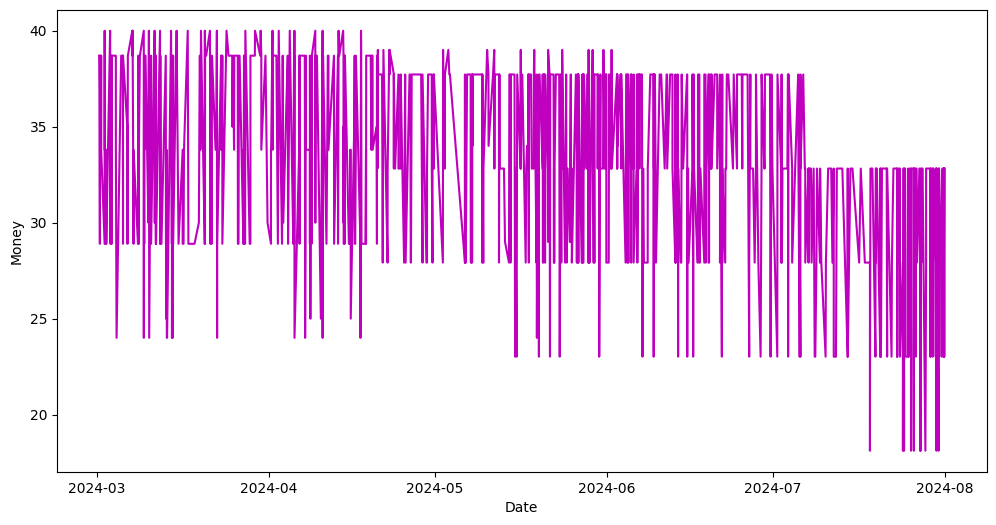

In [ ]:
plt.figure(figsize=(12,6))

plt.plot(df.index,df['money'],color='m')
plt.xlabel('Date')
plt.ylabel('Money')
plt.show()

Removing of outliers:

In [ ]:
df['money_log'] = np.log(df['money'])

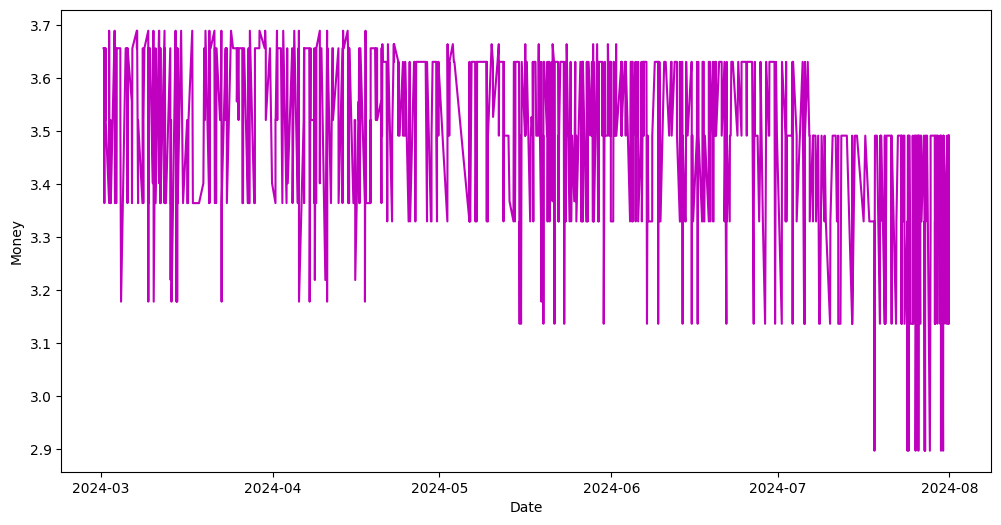

In [ ]:
plt.figure(figsize=(12,6))

plt.plot(df.index,df['money_log'],color='m')
plt.xlabel('Date')
plt.ylabel('Money')
plt.show()

# The Above data set is showing white noise so we cant perform time series model prediction.
